In [51]:
# To mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [53]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [54]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [55]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [56]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [58]:
conv_base.trainable = False

In [59]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/gdrive/MyDrive/Cats & Dogs/training_set/training_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/gdrive/MyDrive/Cats & Dogs/test_set/test_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 8015 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [60]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [61]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [62]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds,verbose=1)

Epoch 1/10
251/251 [==============================] - 33s 113ms/step - loss: 0.3384 - accuracy: 0.8574 - val_loss: 0.2357 - val_accuracy: 0.9011
Epoch 2/10
251/251 [==============================] - 29s 113ms/step - loss: 0.2064 - accuracy: 0.9139 - val_loss: 0.2397 - val_accuracy: 0.9026
Epoch 3/10
251/251 [==============================] - 25s 97ms/step - loss: 0.1472 - accuracy: 0.9414 - val_loss: 0.2545 - val_accuracy: 0.8987
Epoch 4/10
251/251 [==============================] - 24s 96ms/step - loss: 0.1308 - accuracy: 0.9466 - val_loss: 0.3502 - val_accuracy: 0.8749
Epoch 5/10
251/251 [==============================] - 24s 95ms/step - loss: 0.1065 - accuracy: 0.9556 - val_loss: 0.3306 - val_accuracy: 0.8883
Epoch 6/10
251/251 [==============================] - 23s 92ms/step - loss: 0.0821 - accuracy: 0.9661 - val_loss: 0.2970 - val_accuracy: 0.8997
Epoch 7/10
251/251 [==============================] - 24s 94ms/step - loss: 0.0579 - accuracy: 0.9817 - val_loss: 0.3330 - val_accurac

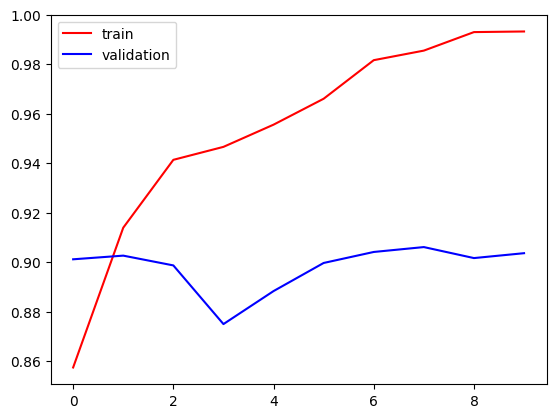

In [63]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

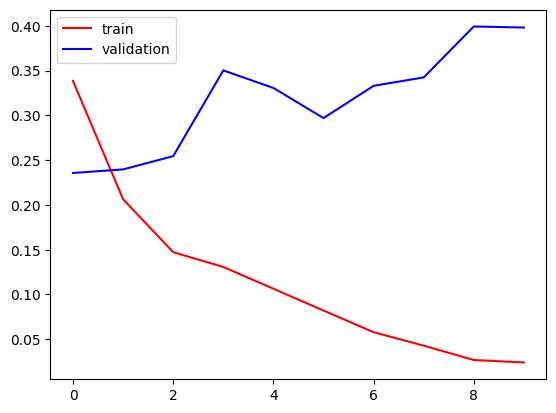

In [64]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [66]:
test_image = image.load_img('/content/download (4).jpg',target_size=(150,150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

1/1 [==============================] - 0s 150ms/step
cat


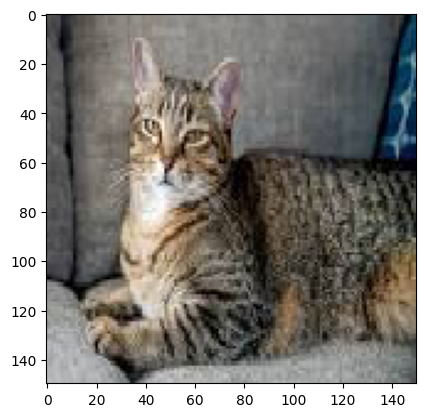

In [67]:
test_image = image.load_img('/content/download (4).jpg',target_size=(150,150))
plt.imshow(test_image)

In [68]:
test_image_2 = image.load_img('/content/download (6).jpg',target_size=(150,150))
test_image_2 = image.img_to_array(test_image_2)
test_image_2 = np.expand_dims(test_image_2,axis=0)
result = model.predict(test_image_2)

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

1/1 [==============================] - 0s 21ms/step
dog


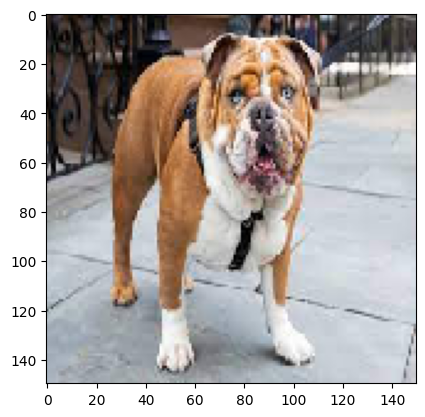

In [69]:
test_image_2 = image.load_img('/content/download (6).jpg',target_size=(150,150))
plt.imshow(test_image_2)